<a href="https://colab.research.google.com/github/PedroNaon/COLABORATORY/blob/main/colab_laboratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INSTALAR E IMPORTAR LIBRERÍAS NECESARIAS

In [21]:
!pip install yfinance fredapi --quiet

In [22]:
import yfinance as yf
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# CONFIGURACIÓN INICIAL

In [23]:
start_date = '2000-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')
fred_api_key = '9eb5b198345d9bbad350ec5794c5d9d0'

# DESCARGAR DATOS DE FRED

In [24]:
fred = Fred(api_key=fred_api_key)
fred_series_id = 'GDP'  # Producto Bruto Interno de EE.UU.
gdp_data = fred.get_series(fred_series_id, observation_start=start_date)

Convertir a df

In [25]:
df_fred = gdp_data.reset_index()
df_fred.columns = ['Date', 'GDP']
df_fred['Date'] = pd.to_datetime(df_fred['Date'])

# DESCARGAR DATOS DE YAHOO FINANCE

In [26]:
ticker = 'AMZN'
df_yahoo = yf.download(ticker, start=start_date, end=end_date)
df_yahoo.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


# MOSTRAR HEAD DE AMBOS

In [27]:
print("Datos FRED (GDP):")
display(df_fred.head())

print("\nDatos Yahoo Finance (PFE):")
display(df_yahoo.head())

Datos FRED (GDP):


,Date,GDP
0,2000-01-01,10002.179
1,2000-04-01,10247.720
2,2000-07-01,10318.165
3,2000-10-01,10435.744
4,2001-01-01,10470.231



Datos Yahoo Finance (PFE):


Price,Date,Close,High,Low,Open,Volume
Ticker,,AMZN,AMZN,AMZN,AMZN,AMZN
0,2000-01-03,4.468750,4.478125,3.952344,4.075000,322352000
1,2000-01-04,4.096875,4.575000,4.087500,4.268750,349748000
2,2000-01-05,3.487500,3.756250,3.400000,3.525000,769148000
3,2000-01-06,3.278125,3.634375,3.200000,3.565625,375040000
4,2000-01-07,3.478125,3.525000,3.309375,3.350000,210108000


# GRAFICOS DE EJEMPLO

GDP (FRED)

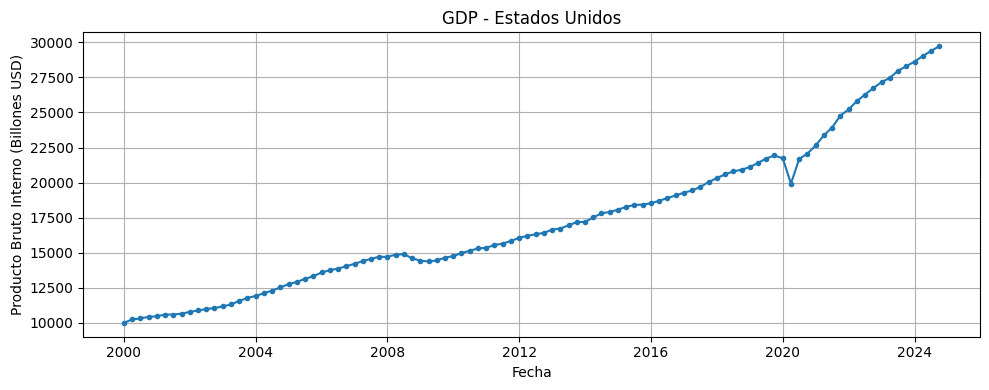

In [28]:
plt.figure(figsize=(10, 4))
plt.plot(df_fred['Date'], df_fred['GDP'], marker='o', markersize=3)
plt.title('GDP - Estados Unidos')
plt.xlabel('Fecha')
plt.ylabel('Producto Bruto Interno (Billones USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

# GRAFICO DE LINEAS - ACCIONES DE INTERES

In [35]:
def graficar_accion(df, ticker):
  df = yf.download(ticker, start=start_date, end=end_date)
  df.reset_index(inplace=True)


  plt.figure(figsize=(10, 4))
  plt.plot(df['Date'], df['Close'])
  plt.title(f'Precio de cierre para {ticker}')
  plt.xlabel('Fecha')
  plt.ylabel('USD')
  plt.grid(True)
  plt.tight_layout()
  plt.show()

[*********************100%***********************]  1 of 1 completed


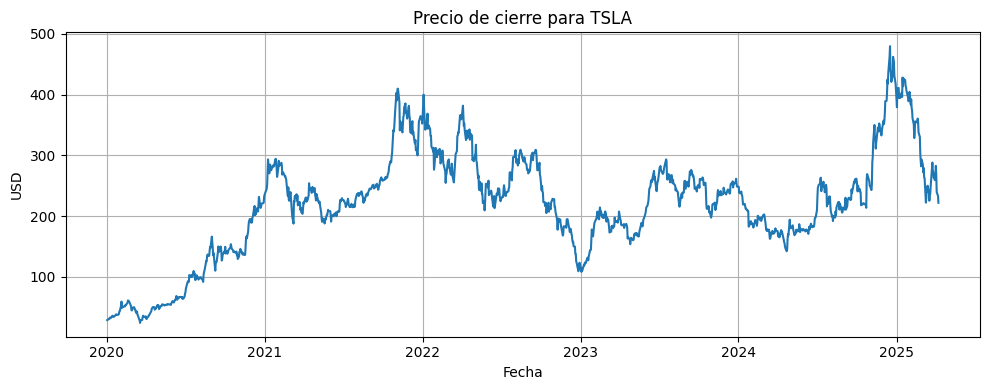

[*********************100%***********************]  1 of 1 completed


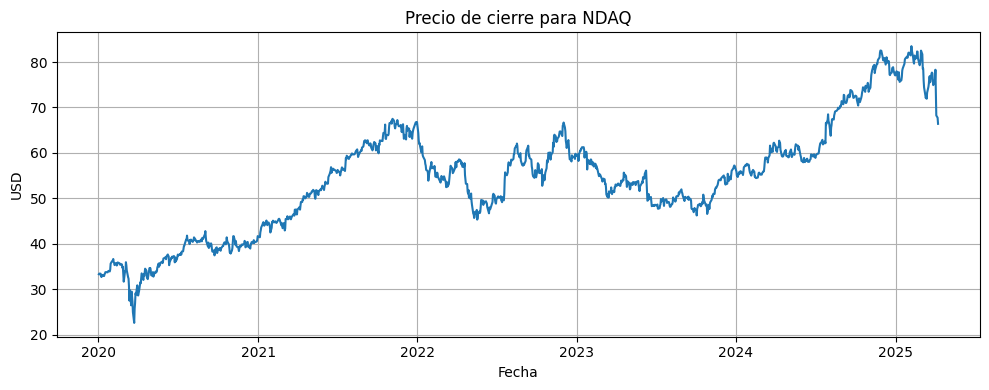

[*********************100%***********************]  1 of 1 completed


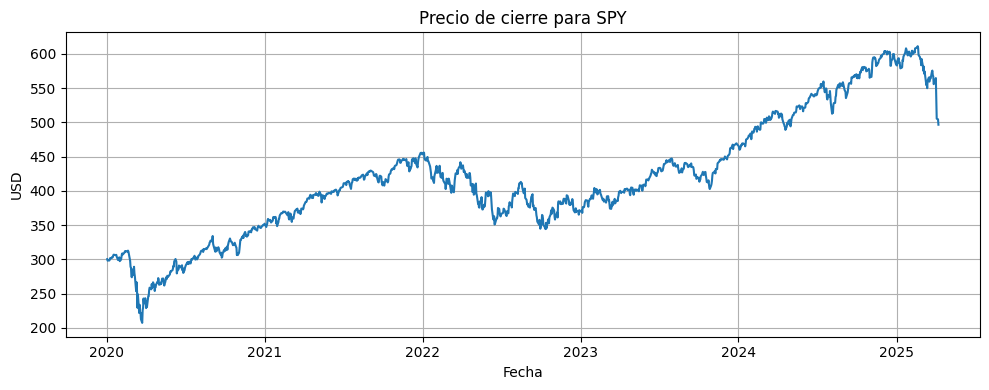

In [38]:
start_date = '2020-01-01'

graficar_accion(df_yahoo, 'TSLA')
graficar_accion(df_yahoo, 'NDAQ')
graficar_accion(df_yahoo, 'SPY')